# Homework 2

## Data preprocess

In [53]:
import numpy as np
import csv
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import matplotlib.pyplot as plt

In [54]:
raw_train_data = pd.read_csv('df1_train.csv') 
train_data = raw_train_data.drop('life_post_consumer', 1)
test_data = pd.read_csv('df1_test1.csv') 
test_y_data = pd.read_csv('df1_test1y.csv') 
print(list(train_data.columns.values))

['comp_page_like', 'Paid', 'life_post_reach', 'life_post_impression_liked', 'life_post_reach_liked', 'comment', 'like', 'share', 'type_link', 'type_status', 'type_video', 'cat2', 'cat3', 'month1', 'month2', 'month3', 'month4', 'month5', 'month6', 'month7', 'month8', 'month9', 'month10', 'month11', 'dow1', 'dow2', 'dow3', 'dow4', 'dow5', 'dow6', 'hour2', 'hour3', 'hour4', 'hour5', 'hour6', 'hour7', 'hour8', 'hour9', 'hour10', 'hour11', 'hour12', 'hour13', 'hour14']


In [55]:
train_data.head()

,comp_page_like,Paid,life_post_reach,life_post_impression_liked,life_post_reach_liked,comment,like,share,type_link,type_status,...,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14
0,125612,0,2763,3519,2124,0,62,10,0,0,...,0,0,0,0,0,0,0,0,0,0
1,135700,0,3756,4935,2556,16,117,30,0,0,...,0,0,0,0,0,0,1,0,0,0
2,137020,1,1357,2154,1120,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,137893,1,37376,22100,10880,20,411,74,0,0,...,0,0,0,0,0,0,0,0,0,0
4,133594,0,1809,2541,1435,2,64,7,0,0,...,0,0,0,1,0,0,0,0,0,0


In [56]:
# y:
train_y = raw_train_data['life_post_consumer'].values
test_y = test_y_data.values
test_y = np.reshape(test_y, len(test_y))
# x: seperate continuous and binary 
con = ['comp_page_like', 'life_post_reach', 'life_post_impression_liked', 'life_post_reach_liked', 'comment', 'like', 'share']
binary = ['Paid', 'type_link', 'type_status', 'type_video', 'cat2', 'cat3', 'month1', 'month2', 'month3', 'month4', 'month5', 
          'month6', 'month7', 'month8', 'month9', 'month10', 'month11', 'dow1', 'dow2', 'dow3', 'dow4', 'dow5', 'dow6', 'hour2', 
          'hour3', 'hour4', 'hour5', 'hour6', 'hour7', 'hour8', 'hour9', 'hour10', 'hour11', 'hour12', 'hour13', 'hour14']
train_x_con = train_data[con].values
train_x_binary = train_data[binary].values
test_x_con = test_data[con].values
test_x_binary = test_data[binary].values

outcome preprocess:
1. keep - keep the original numerical value
2. de-mean - subtract mean(y) of training data from outcome values in trainin

In [57]:
y_mean_train = np.mean(train_y)
demean_train_y = [x - y_mean_train for x in train_y] 

feature preprocess:
1. keep
2. std. - standardize(apply to testing data using mean and sd of the training data) 

In [58]:
std_scale = preprocessing.StandardScaler().fit(train_x_con)
train_x_con_std = std_scale.transform(train_x_con)
test_x_con_std  = std_scale.transform(test_x_con)
std_binary_scale = preprocessing.StandardScaler().fit(train_x_binary)
train_x_binary_std = std_binary_scale.transform(train_x_binary)
test_x_binary_std  = std_binary_scale.transform(test_x_binary)
train_x_std_std = np.concatenate([train_x_con_std, train_x_binary_std], axis = 1) 
test_x_std_std = np.concatenate([test_x_con_std, test_x_binary_std], axis = 1) 
train_x_std_keep = np.concatenate([train_x_con_std, train_x_binary], axis = 1) 
test_x_std_keep = np.concatenate([test_x_con_std, test_x_binary], axis = 1) 
train_x_keep_keep = train_data.values
test_x_keep_keep = test_data.values

## Q1 - exploratory analysis
1. summary statistics 

In [59]:
print("Summary of the outcome values in training data")
raw_train_data['life_post_consumer'].describe()

Summary of the outcome values in training data


count      400.000000
mean       810.340000
std        899.037251
min         17.000000
25%        335.000000
50%        554.500000
75%        955.500000
max      11328.000000
Name: life_post_consumer, dtype: float64

In [60]:
print("Summary of the continuous features in training data")
train_data[con].describe()

Summary of the continuous features in training data


,comp_page_like,life_post_reach,life_post_impression_liked,life_post_reach_liked,comment,like,share
count,400.000000,400.000000,4.000000e+02,400.000000,400.000000,400.00000,400.000000
mean,122890.625000,13436.855000,1.747735e+04,6585.952500,6.855000,169.07250,25.485000
std,16280.121461,20454.614675,6.614514e+04,7599.228501,14.402519,243.14837,25.946248
min,81370.000000,238.000000,5.670000e+02,236.000000,0.000000,0.00000,0.000000
25%,112676.000000,3282.500000,3.962500e+03,2171.000000,1.000000,55.75000,10.000000
50%,128816.000000,5150.000000,6.214500e+03,3391.000000,3.000000,98.00000,18.500000
75%,136393.000000,13232.000000,1.510450e+04,8011.000000,7.000000,187.25000,32.000000
max,139441.000000,139008.000000,1.107833e+06,48368.000000,146.000000,1998.00000,208.000000


2. visualization of key variables

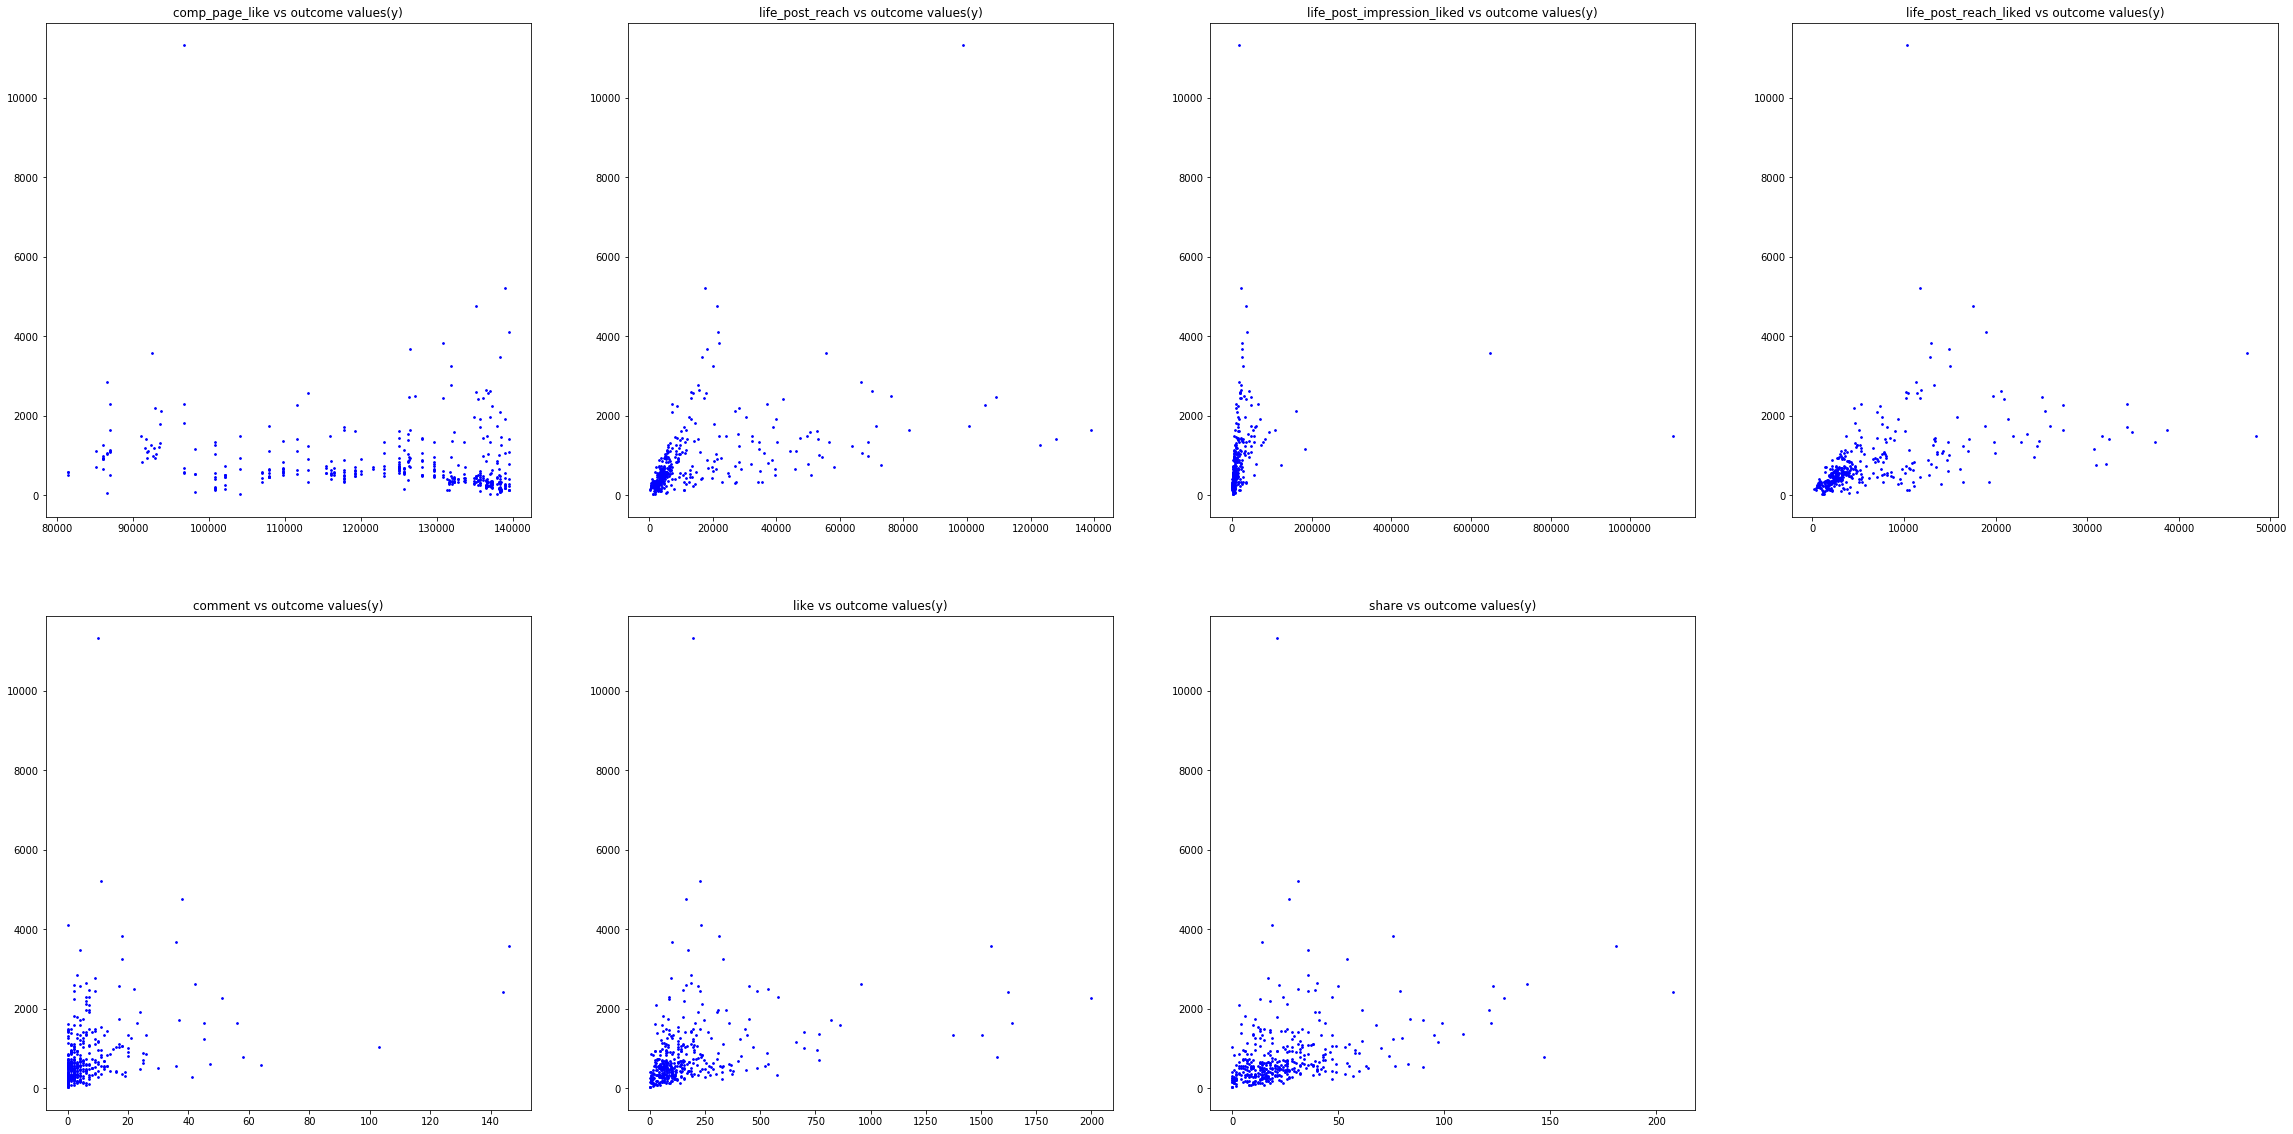

In [61]:
plt_cnt = 1
plt.figure(figsize=(40, 20))
for i in con:
    plt.subplot(2,4, plt_cnt)
    plt.title("{} vs outcome values(y)".format(i))
    plt.scatter(train_data[i], raw_train_data['life_post_consumer'],c="blue", s=3)
    plt_cnt += 1
plt.show()

3. discuss characteristics of the dataset
- There are 7 continuous variables and 36 binary variables in the dataset
- Properties of the continuous variables and outcome values y were shown above

## Q2 - Case 1
Simply use ymean in training data to predict
- ymean
- x: not used y: keep
- test RMSE
- predictions and true outcome values for the first 20 data points

In [62]:
output = [np.mean(train_y)]*len(test_y)
rmse_1 = np.sqrt(mse(output, test_y))
print("RMSE:", rmse_1)
for i in range(20):
    print("prediction: {}\t true value: {}".format(output[i], test_y[i]))

RMSE: 928.8095109332162
prediction: 810.34	 true value: 1183
prediction: 810.34	 true value: 189
prediction: 810.34	 true value: 2327
prediction: 810.34	 true value: 76
prediction: 810.34	 true value: 354
prediction: 810.34	 true value: 713
prediction: 810.34	 true value: 204
prediction: 810.34	 true value: 288
prediction: 810.34	 true value: 555
prediction: 810.34	 true value: 586
prediction: 810.34	 true value: 446
prediction: 810.34	 true value: 884
prediction: 810.34	 true value: 524
prediction: 810.34	 true value: 672
prediction: 810.34	 true value: 23
prediction: 810.34	 true value: 570
prediction: 810.34	 true value: 1361
prediction: 810.34	 true value: 5934
prediction: 810.34	 true value: 2319
prediction: 810.34	 true value: 1633


## Q3 - Case 2A
- OLS
- x: keep-keep y: keep

In [63]:
regr = LinearRegression().fit(train_x_keep_keep, train_y)
output = regr.predict(test_x_keep_keep)
rmse_2A = np.sqrt(mse(output, test_y))
print("RMSE:", rmse_2A)
for i in range(20):
    print("prediction: {}\t true value: {}".format(output[i], test_y[i]))

RMSE: 692.289127136201
prediction: 781.5799150705279	 true value: 1183
prediction: 315.9204311198191	 true value: 189
prediction: 2279.084852401181	 true value: 2327
prediction: -136.3428637272973	 true value: 76
prediction: 302.35624062148236	 true value: 354
prediction: 462.42402367947943	 true value: 713
prediction: 321.6777082436947	 true value: 204
prediction: 504.5224476762178	 true value: 288
prediction: 505.8954710411399	 true value: 555
prediction: 488.36700578015734	 true value: 586
prediction: 392.6142351937815	 true value: 446
prediction: 388.9184670987779	 true value: 884
prediction: 804.8752750894855	 true value: 524
prediction: 634.3236443157402	 true value: 672
prediction: 176.31765618431382	 true value: 23
prediction: 645.7291380968691	 true value: 570
prediction: 1983.5385887130615	 true value: 1361
prediction: 3144.397100454392	 true value: 5934
prediction: 4060.61071217642	 true value: 2319
prediction: 4288.223080997647	 true value: 1633


## Q4 - Case 2B
- OLS
- x: keep-keep y: de-mean

In [64]:
regr = LinearRegression().fit(train_x_keep_keep, demean_train_y)
output = regr.predict(test_x_keep_keep)
output = [x + y_mean_train for x in output]
rmse_2B = np.sqrt(mse(output, test_y))
print("RMSE:", rmse_2B)
for i in range(20):
    print("prediction: {}\t true value: {}".format(output[i], test_y[i]))

RMSE: 692.289127136183
prediction: 781.5799150699094	 true value: 1183
prediction: 315.9204311202519	 true value: 189
prediction: 2279.084852401056	 true value: 2327
prediction: -136.34286372688632	 true value: 76
prediction: 302.3562406218442	 true value: 354
prediction: 462.4240236797067	 true value: 713
prediction: 321.6777082440475	 true value: 204
prediction: 504.52244767662694	 true value: 288
prediction: 505.89547104143264	 true value: 555
prediction: 488.36700578043735	 true value: 586
prediction: 392.61423519413245	 true value: 446
prediction: 388.91846709911067	 true value: 884
prediction: 804.8752750898637	 true value: 524
prediction: 634.3236443160184	 true value: 672
prediction: 176.31765618468842	 true value: 23
prediction: 645.7291380971382	 true value: 570
prediction: 1983.5385887131888	 true value: 1361
prediction: 3144.397100453739	 true value: 5934
prediction: 4060.6107121746045	 true value: 2319
prediction: 4288.223080997545	 true value: 1633


## Q5 - Case 2C
- OLS
- x: std.-std. y: de-mean

In [65]:
regr = LinearRegression().fit(train_x_std_std, demean_train_y)
output = regr.predict(test_x_std_std)
output = [x + y_mean_train for x in output]
rmse_2C = np.sqrt(mse(output, test_y))
print("RMSE:", rmse_2C)
for i in range(20):
    print("prediction: {}\t true value: {}".format(output[i], test_y[i]))

RMSE: 692.2891271371996
prediction: 781.5799150726236	 true value: 1183
prediction: 315.92043111964745	 true value: 189
prediction: 2279.0848523990194	 true value: 2327
prediction: -136.34286372742872	 true value: 76
prediction: 302.35624062146957	 true value: 354
prediction: 462.4240236767421	 true value: 713
prediction: 321.67770824388356	 true value: 204
prediction: 504.52244767322355	 true value: 288
prediction: 505.89547103829807	 true value: 555
prediction: 488.36700578017263	 true value: 586
prediction: 392.61423519385033	 true value: 446
prediction: 388.9184670986701	 true value: 884
prediction: 804.8752750893718	 true value: 524
prediction: 634.3236443159282	 true value: 672
prediction: 176.31765618415238	 true value: 23
prediction: 645.72913809404	 true value: 570
prediction: 1983.5385887135376	 true value: 1361
prediction: 3144.3971004532423	 true value: 5934
prediction: 4060.6107121870778	 true value: 2319
prediction: 4288.223081003449	 true value: 1633


We can see that whether features are standardized or not doesn't matter in OLS method.

## Q6 - Case 3A
- Ridge
- x: keep-keep y: keep
- regularization coefficient(alpha): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000
- plot RMSE w.r.t alpha
- find the best test RMSE
- predictions and true outcome for the first 20 data points using the best alpha

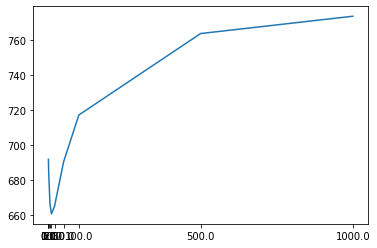

best RMSE: 660.5612900111672 (alpha: 10 )
prediction: 1068.3336238492388	 true value: 1183
prediction: 229.75531919984041	 true value: 189
prediction: 2008.5588919213267	 true value: 2327
prediction: -102.87489949962946	 true value: 76
prediction: 541.4576994726491	 true value: 354
prediction: 606.4592575585203	 true value: 713
prediction: 414.98279829467697	 true value: 204
prediction: 602.8105144219195	 true value: 288
prediction: 500.1843850761293	 true value: 555
prediction: 492.3066355810638	 true value: 586
prediction: 508.37649961334796	 true value: 446
prediction: 409.13002152825584	 true value: 884
prediction: 730.4676804339109	 true value: 524
prediction: 561.0603282026204	 true value: 672
prediction: 294.45089722768375	 true value: 23
prediction: 602.4828674601829	 true value: 570
prediction: 1632.1827150344566	 true value: 1361
prediction: 2698.882817822703	 true value: 5934
prediction: 3841.6315284622815	 true value: 2319
prediction: 3892.400909026028	 true value: 1633


In [66]:
alpha = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
rmse_3A = []
for i in alpha:
    regr = Ridge(alpha = i).fit(train_x_keep_keep, train_y)
    output = regr.predict(test_x_keep_keep)
    rmse = np.sqrt(mse(output, test_y))
    rmse_3A.append(rmse)
#     print("alpha: {}\t RMSE: {}".format(i,rmse))
plt.xticks(alpha)
plt.plot(alpha, rmse_3A)
plt.show()
best_alpha = alpha[np.argmin(rmse_3A)]
print("best RMSE:", np.min(rmse_3A), "(alpha:", best_alpha, ")")
regr = Ridge(alpha = best_alpha).fit(train_x_keep_keep, train_y)
output = regr.predict(test_x_keep_keep)
for i in range(20):
    print("prediction: {}\t true value: {}".format(output[i], test_y[i]))

## Q7 - Case 3B
- Ridge
- x: std.-keep y: de-mean

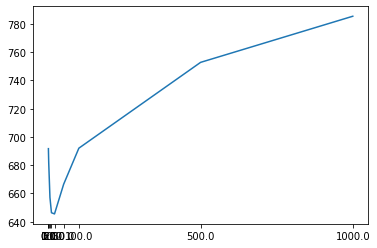

best RMSE: 645.516812393874 (alpha: 20 )
prediction: 1142.2695423408366	 true value: 1183
prediction: 254.1570149211159	 true value: 189
prediction: 1834.0248894378174	 true value: 2327
prediction: 15.718168704053028	 true value: 76
prediction: 599.7636629205394	 true value: 354
prediction: 635.9403898439426	 true value: 713
prediction: 427.85644415790233	 true value: 204
prediction: 603.6620598910198	 true value: 288
prediction: 514.5237878678296	 true value: 555
prediction: 580.0010600720797	 true value: 586
prediction: 544.3417602098282	 true value: 446
prediction: 477.18442083888596	 true value: 884
prediction: 801.5455454188352	 true value: 524
prediction: 557.4528723791393	 true value: 672
prediction: 396.2788654783087	 true value: 23
prediction: 615.1515241152465	 true value: 570
prediction: 1474.67417375635	 true value: 1361
prediction: 2504.8643727349977	 true value: 5934
prediction: 3524.8596448111202	 true value: 2319
prediction: 3438.403437134936	 true value: 1633


In [67]:
rmse_3B = []
for i in alpha:
    regr = Ridge(alpha = i).fit(train_x_std_keep, demean_train_y)
    output = regr.predict(test_x_std_keep)
    output = [x + y_mean_train for x in output]
    rmse = np.sqrt(mse(output, test_y))
    rmse_3B.append(rmse)
#     print("alpha: {}\t RMSE: {}".format(i,rmse))
plt.xticks(alpha)
plt.plot(alpha, rmse_3B)
plt.show()
best_alpha = alpha[np.argmin(rmse_3B)]
print("best RMSE:", np.min(rmse_3B), "(alpha:", best_alpha, ")")
regr = Ridge(alpha = best_alpha).fit(train_x_std_keep, demean_train_y)
output = regr.predict(test_x_std_keep)
output = [x + y_mean_train for x in output]
for i in range(20):
    print("prediction: {}\t true value: {}".format(output[i], test_y[i]))

## Q8 - Case 3C
- Ridge
- x: keep-keep y: de-mean

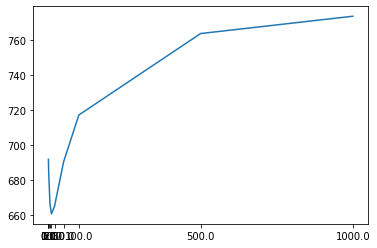

best RMSE: 660.5612900111672 (alpha: 10 )
prediction: 1068.3336238492393	 true value: 1183
prediction: 229.75531919984053	 true value: 189
prediction: 2008.5588919213264	 true value: 2327
prediction: -102.87489949962935	 true value: 76
prediction: 541.457699472649	 true value: 354
prediction: 606.4592575585208	 true value: 713
prediction: 414.98279829467685	 true value: 204
prediction: 602.8105144219195	 true value: 288
prediction: 500.1843850761294	 true value: 555
prediction: 492.30663558106414	 true value: 586
prediction: 508.3764996133481	 true value: 446
prediction: 409.1300215282562	 true value: 884
prediction: 730.4676804339109	 true value: 524
prediction: 561.0603282026204	 true value: 672
prediction: 294.4508972276843	 true value: 23
prediction: 602.4828674601829	 true value: 570
prediction: 1632.1827150344564	 true value: 1361
prediction: 2698.882817822703	 true value: 5934
prediction: 3841.631528462281	 true value: 2319
prediction: 3892.4009090260265	 true value: 1633


In [68]:
rmse_3C = []
for i in alpha:
    regr = Ridge(alpha = i).fit(train_x_keep_keep, demean_train_y)
    output = regr.predict(test_x_keep_keep)
    output = [x + y_mean_train for x in output]
    rmse = np.sqrt(mse(output, test_y))
    rmse_3C.append(rmse)
#     print("alpha: {}\t RMSE: {}".format(i,rmse))
plt.xticks(alpha)
plt.plot(alpha, rmse_3C)
plt.show()
best_alpha = alpha[np.argmin(rmse_3C)]
print("best RMSE:", np.min(rmse_3C), "(alpha:", best_alpha, ")")
regr = Ridge(alpha = best_alpha).fit(train_x_keep_keep, demean_train_y)
output = regr.predict(test_x_keep_keep)
output = [x + y_mean_train for x in output]
for i in range(20):
    print("prediction: {}\t true value: {}".format(output[i], test_y[i]))

## Q9 - Case 3D
- Ridge
- x: std.-std. y: de-mean

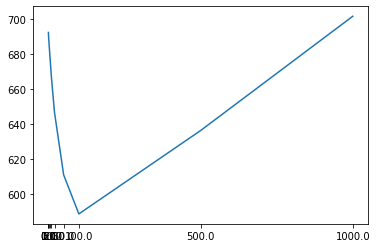

best RMSE: 588.793465752767 (alpha: 100 )
prediction: 1040.5001226108072	 true value: 1183
prediction: 278.46504979772	 true value: 189
prediction: 1997.7244642700325	 true value: 2327
prediction: -21.140365018157354	 true value: 76
prediction: 554.2152570974529	 true value: 354
prediction: 602.8406419024143	 true value: 713
prediction: 337.52346959154676	 true value: 204
prediction: 599.4357852626586	 true value: 288
prediction: 470.2937041599351	 true value: 555
prediction: 500.7241404018718	 true value: 586
prediction: 511.14861912035275	 true value: 446
prediction: 387.7435534965068	 true value: 884
prediction: 700.0895765181288	 true value: 524
prediction: 532.2228096919928	 true value: 672
prediction: 255.18311778364523	 true value: 23
prediction: 653.3563783030608	 true value: 570
prediction: 1728.1691916931402	 true value: 1361
prediction: 2775.002710950044	 true value: 5934
prediction: 3174.792251892934	 true value: 2319
prediction: 3141.8579760883254	 true value: 1633


In [69]:
rmse_3D = []
for i in alpha:
    regr = Ridge(alpha = i).fit(train_x_std_std, demean_train_y)
    output = regr.predict(test_x_std_std)
    output = [x + y_mean_train for x in output]
    rmse = np.sqrt(mse(output, test_y))
    rmse_3D.append(rmse)
#     print("alpha: {}\t RMSE: {}".format(i,rmse))
plt.xticks(alpha)
plt.plot(alpha, rmse_3D)
plt.show()
best_alpha = alpha[np.argmin(rmse_3D)]
print("best RMSE:", np.min(rmse_3D), "(alpha:", best_alpha, ")")
regr = Ridge(alpha = best_alpha).fit(train_x_std_std, demean_train_y)
output = regr.predict(test_x_std_std)
output = [x + y_mean_train for x in output]
for i in range(20):
    print("prediction: {}\t true value: {}".format(output[i], test_y[i]))

## Q10 - Case 4
- Lasso
- x: std.-keep y:de-mean

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47976963.79253879, tolerance: 32249.892376
  positive)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4456870.003093511, tolerance: 32249.892376
  positive)


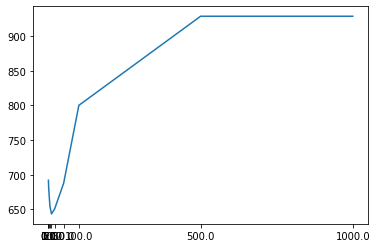

best RMSE: 643.3855039398903 (alpha: 10 )
prediction: 1241.5959080793423	 true value: 1183
prediction: 287.8868729079718	 true value: 189
prediction: 2119.9130474876188	 true value: 2327
prediction: -16.300846730910052	 true value: 76
prediction: 449.09988350124877	 true value: 354
prediction: 711.1496827465938	 true value: 713
prediction: 398.0584448746948	 true value: 204
prediction: 460.1562219390779	 true value: 288
prediction: 645.4477213864677	 true value: 555
prediction: 591.4330233308604	 true value: 586
prediction: 429.9644076126842	 true value: 446
prediction: 461.4789915445707	 true value: 884
prediction: 899.8082551086084	 true value: 524
prediction: 571.8650372596213	 true value: 672
prediction: 352.8634345979192	 true value: 23
prediction: 548.0899016138125	 true value: 570
prediction: 1741.0145296996247	 true value: 1361
prediction: 2712.056805291796	 true value: 5934
prediction: 3681.4712297030082	 true value: 2319
prediction: 3645.134974316373	 true value: 1633


In [70]:
rmse_4 = []
for i in alpha:
    regr = Lasso(alpha = i).fit(train_x_std_keep, demean_train_y)
    output = regr.predict(test_x_std_keep)
    output = [x + y_mean_train for x in output]
    rmse = np.sqrt(mse(output, test_y))
    rmse_4.append(rmse)
#     print("alpha: {}\t RMSE: {}".format(i,rmse))
plt.xticks(alpha)
plt.plot(alpha, rmse_4)
plt.show()
best_alpha = alpha[np.argmin(rmse_4)]
print("best RMSE:", np.min(rmse_4), "(alpha:", best_alpha, ")")
regr = Lasso(alpha = best_alpha).fit(train_x_std_keep, demean_train_y)
output = regr.predict(test_x_std_keep)
output = [x + y_mean_train for x in output]
for i in range(20):
    print("prediction: {}\t true value: {}".format(output[i], test_y[i]))

## Q11
Summarize the best RMSE and discuss the findings

| Method  | x_continue  | x_binary  | y  | RMSE  |
|:---:|:---:|:---:|:---:|:---:|
| ymean  | not used  | not used  | keep  | 928.8095109332162  |
| OLS  | keep  | keep  | keep  | 692.289127136201  |
| OLS  | keep  | keep  | de-mean  | 692.289127136183  |
| OLS  | std.  | std.  | de-mean  | 692.2891271371996  |
| Ridge  | keep  | keep  | keep  | 660.5612900111672  |
| Ridge  | std.  | keep  | de-mean  | 645.516812393874  |
| Ridge  | keep  | keep  | de-mean  | 660.5612900111672  |
| Ridge  | std.  | std.  | de-mean  | 588.793465752767  |
| Lasso  | std.  | keep  | de-mean  | 643.3855039398903  |

### Findings:
1. For OLS, preprocessing method to either features or outcome values won't affect the performance.
2. For Ridge, preprocessing method on outcome values(de-mean y) won't affect the performance, but standardization will improve performance. 
    - We should standardize both continuous and binary features to reach best performance.
3. For Lasso, compared with Ridge method under same preprocessing situation, it had a better performance.
